# DATASET - Alquileres AIRBNB en Europa

**Descripción:**
Departamentos en alquiler en AIRBNB en Europa, en función de tipo de las características del local.

**Variables de interés:**
Ciudad, Precio, Tipo, Capacidad, Distancias a puntos de interés, Distancias al metro

**Fuente:** 
https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

**Objetivo:**
Generar hipótesis de interés sobre el dataset, crear visualizaciones e interpretar los resultados obtenidos.

## ABSTRACT

- Objetivo: Generar un modelo matemático que nos permita obtener el valor de alquiler que puede rentabilizarse de una propiedad. Ésta fórmula nos posibilatará saber si es económicamente conveniente comprar una propiedad, relacionando su valor de venta, rentabilidad esperada y valor de alquiler, según la fórmula obtenida.
  
- Contexto comercial: En los últimos años ha crecido sustancialmente la cantidad de propiedades en alquiler con fines turísticos en distintas ciudades de Europa, reemplazando muchas veces como destino de turismo el lugar que antes ocupaban las habitaciones de hotel. Tenemos en nuestro poder los datos de las propiedades en alquiler y sus características en las principales ciudades europeas. Hemos sido contratados para determinar el precio de alquiler en función de los datos de cada una, según un modelo matemático, lo que permitirá saber si es conveniente, o no, comprar una propiedad para ponerla en alquiler con esos fines.
  
- Problema comercial: Conociendo los datos de una propiedad particular, (como ser, ciudad en la que se encuenta, capacidad de personas, cantidad de dormitorios, cercanía a atracciones y restaurantes) debemos ser capaces de obtener el precio de alquiler que puede obtenerse al ponerla en renta. Con este valor, podremos calcular el máximo valor que podemos pagar para comprarla, en función de la rentabilidad que deseamos obtener de esa inversión. 
  
- Preguntas/hipótesis: Dada una propiedad con sus características conocidas, ¿podemos averiguar cuál es el precio de alquiler que puede obtenerse al ponerla en renta? ¿El valor de alquiler varía en función de la ciudad en que se encuentra? ¿Las caracterísiticas de la propiedad (ubicación, tamaño, capacidad) modifican el precio de alquiler? ¿Es conveniente comprar una propiedad mejor ubicada o de mayor capacidad, a los fines de obtener una mayor rentabilidad de la inversión? ¿Qué caracterísitica es la más valorada por los usuarios a los fines de pagar un mayor precio de alquiler?
  
- Contexto analítico: Toda la información recopilada se encuentra subida en un archivo .csv en un repositorio de github, de donde debermos leer, transformar y preparar los datos para su mejor visualización. Luego realizaremos análisis y gráficos para encontrar relaciones entre las distintas variables y los precios de alquiler.


## DATOS


En primer lugar importaremos los datos desde nuestro repositorio de github y reemplazaremos los nombres de las columnas para eliminar espacios blancos, buscando evitar problemas en el código futuro.

In [93]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/tekluis/CoderHouse/main/Aemf.csv'
response = requests.get(url).text
csv_data = StringIO(response)

df = pd.read_csv(csv_data)

df = df.drop('Normalised Attraction Index', axis=1)
df = df.drop('Normalised Restraunt Index', axis=1)

nombres_nuevos = {
    'Room Type': 'Room_Type',
    'Shared Room': 'Shared_Room',
    'Private Room': 'Private_Room',
    'Person Capacity': 'Person_Capacity',
    'Multiple Rooms': 'Multiple_Rooms',
    'Cleanliness Rating': 'Cleanliness_Rating',
    'Guest Satisfaction': 'Guest_Satisfaction',
    'City Center (km)': 'City_Center',
    'Metro Distance (km)': 'Metro_Distance',
    'Attraction Index': 'Attraction_Index',
    'Restraunt Index': 'Restraunt_Index'
}

df = df.rename(columns=nombres_nuevos)

df['Attraction_Index'] = df['Attraction_Index']/1000
df['Restraunt_Index'] = df['Restraunt_Index']/1000

print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
df

Cantidad de filas: 41714
Cantidad de columnas: 17


,City,Price,Day,Room_Type,Shared_Room,Private_Room,Person_Capacity,Superhost,Multiple_Rooms,Business,Cleanliness_Rating,Guest_Satisfaction,Bedrooms,City_Center,Metro_Distance,Attraction_Index,Restraunt_Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,0.078690,0.098254
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,0.631176,0.837281
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,0.075276,0.095387
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,0.493273,0.875033
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,0.552830,0.815306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,0.219402,0.438757
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,0.204970,0.342183
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,0.169073,0.282296
41712,Vienna,301.054157,Weekend,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,0.109237,0.158563


Columnas de interés:
- City: Ciudad en la que se encuentra ubicada la propiedad en alquiler.
- Price: Precio de alquiler actual, expresado en euros por día.
- Person_Capaciy: Cantidad de personas máxima que puede albergar la propiedad.
- Bedrooms: Cantidad de habitaciones disponibles en la propiedad.
- City_Center: Distancia al centro de la ciudad medida en kms.
- Metro_Distance: Distancia a la parada del metro más cercana en kms.
- Atraction_Index: Cantidad de atracciones cercanas.
- Restraunt_Index: Cantidad de restaurantes cercanos.

## EXPLORATORY DATA ANALYSIS - EDA

Para definir cuáles de las columnas de interés, enumeradas en el apartado anterior, tiene mayor relación con el precio de alquiler, realizaremos una matriz de correlación entre ellas.

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_21157/2539512544.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


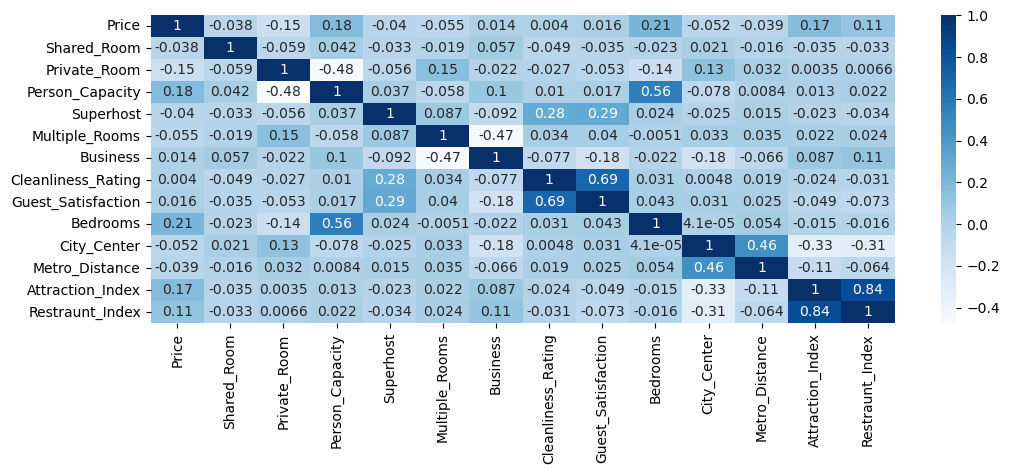

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.show()

En la primera columna de la tabla anterior, podemos ver que las variables indepedientes que mejor correlacionan con la variable dependiente 'Price' son 'Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index' y 'Restraunt_Index'.

Haremos algunos gráficos para entender mejor la relación. En primer lugar analizaremos Person_Capacity y Bedrooms.

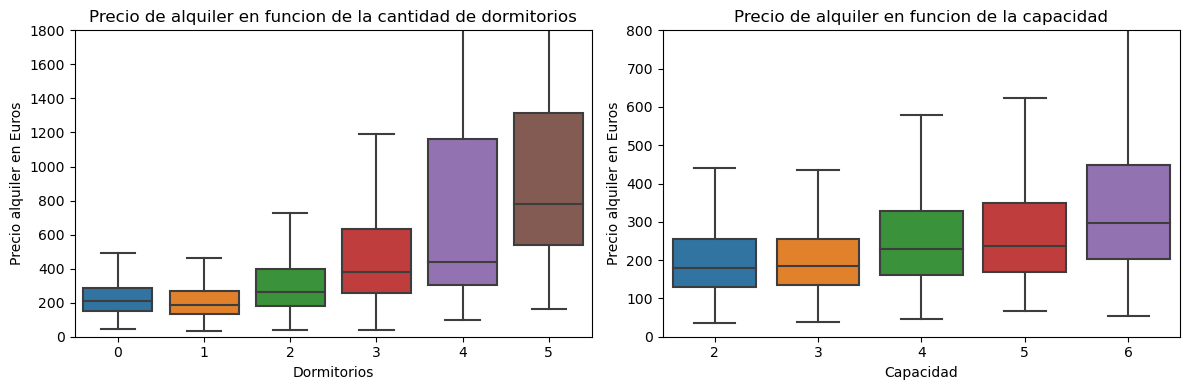

In [95]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(data=df, y='Price', x='Bedrooms', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cantidad de dormitorios', xlabel='Dormitorios',
       ylabel='Precio alquiler en Euros', ylim=(0,1800), xlim=(-0.5,5.5))

sns.boxplot(data=df, y='Price', x='Person_Capacity', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de la capacidad', xlabel='Capacidad',
       ylabel='Precio alquiler en Euros', ylim=(0,800))

plt.tight_layout()
plt.show()

Según los gráficos parece que ambas variables, Bedrooms y Person_Capacity, correlacionan bastante bien con el precio. 

Continuando con los gráficos, haremos lo mismo con Attraction_Index y Restraunt_Index

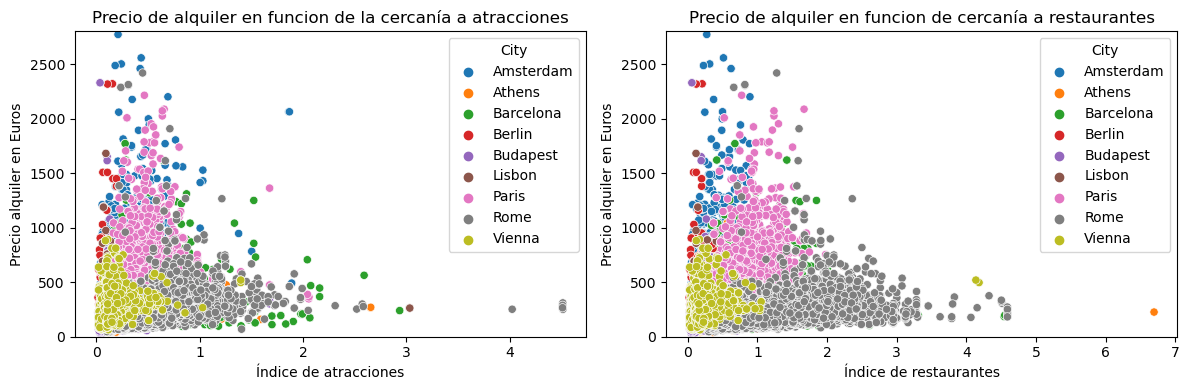

In [96]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(data=df, y='Price', x='Attraction_Index', hue='City',ax=ax[0])
ax[0].set(title='Precio de alquiler en funcion de la cercanía a atracciones', xlabel='Índice de atracciones',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

sns.scatterplot(data=df, y='Price', x='Restraunt_Index', hue='City', ax=ax[1])
ax[1].set(title='Precio de alquiler en funcion de cercanía a restaurantes', xlabel='Índice de restaurantes',
       ylabel='Precio alquiler en Euros', ylim=(0,2800))

plt.tight_layout()
plt.show()

Según los gráficos anteriores no podemos concluir que haya relación directa en entre las variables Attraction_Index y Restarurant_Index y el precio de alquiler.

Para terminar con los gráficos, analizaremos la variable categórica 'Private_Room' en relación al precio, en un gráfico general para todas las ciudades y en otro discriminado por ciudad.

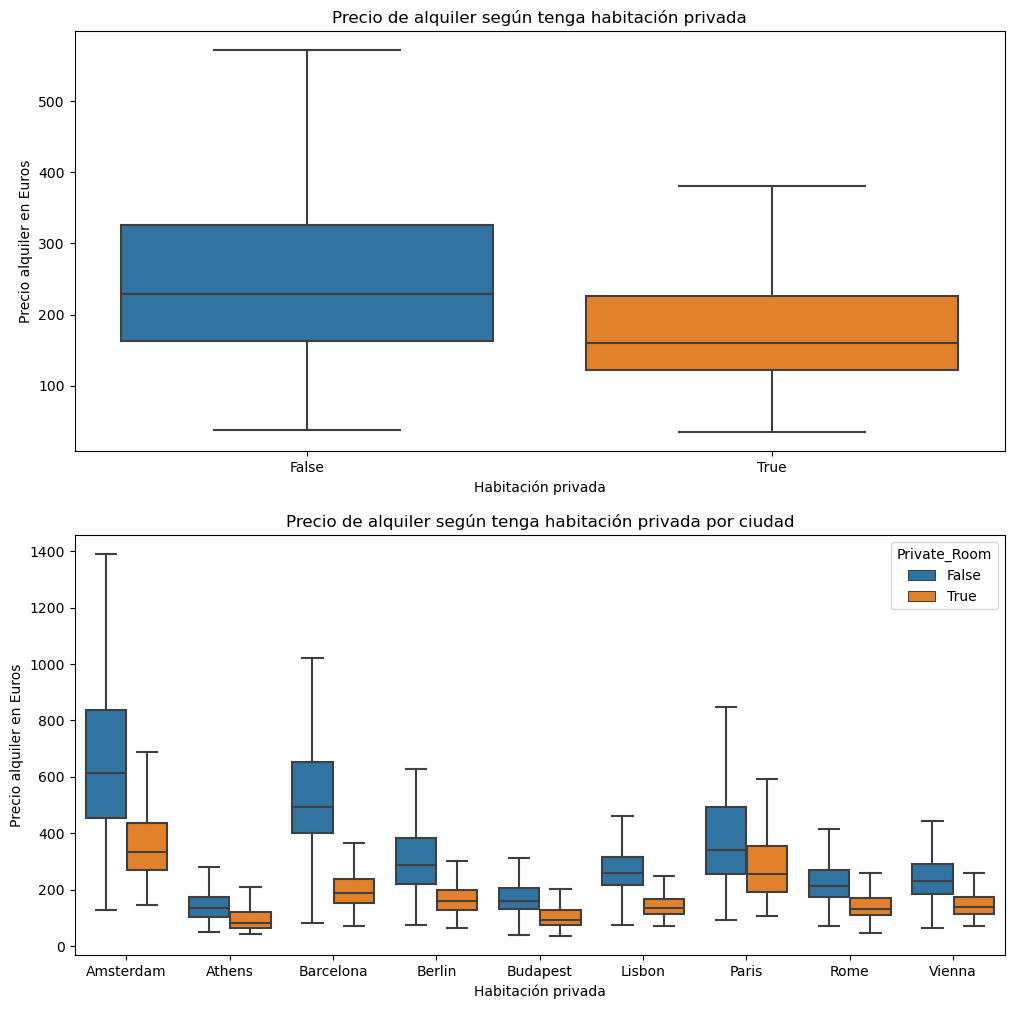

In [97]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

sns.boxplot(data=df, y='Price', x='Private_Room', showfliers=False, ax=ax[0])
ax[0].set(title='Precio de alquiler según tenga habitación privada', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

sns.boxplot(data=df, y='Price', x='City', hue='Private_Room', showfliers=False, ax=ax[1])
ax[1].set(title='Precio de alquiler según tenga habitación privada por ciudad', xlabel='Habitación privada',
       ylabel='Precio alquiler en Euros')

plt.show()

Según los gráficos anteriores, tanto a nivel general, como discrimando por ciudad, los precios son mayores cuando la habitación en alquiler no es privada.

Para avanzar con las conclusiones, usaremos la librería pingouin para calcular los p-values para determinar si las 5 variables independientes están relacionadas con la variable dependiente precio.

In [98]:
import pingouin as pg

print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Person_Capacity'], y=df['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Bedrooms'], y=df['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Attraction_Index'], y=df['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Restraunt_Index'], y=df['Price'])
print('Restraunt Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df['Private_Room'], y=df['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
             n         r         CI95%          p-val       BF10  power
pearson  41714  0.179969  [0.17, 0.19]  1.295786e-300  9.94e+295    1.0
-------------------------------------------------------------
Bedrooms:
             n         r        CI95%  p-val BF10  power
pearson  41714  0.206687  [0.2, 0.22]    0.0  inf    1.0
-------------------------------------------------------------
Attraction Index:
             n         r         CI95%          p-val        BF10  power
pearson  41714  0.168785  [0.16, 0.18]  3.791096e-264  3.637e+259    1.0
-------------------------------------------------------------
Restraunt Index:
             n         r        CI95%          p-val        BF10  power
pearson  41714  0.113171  [0.1, 0.12]  6.021365e-119  3.467e+114    1.0
-------------------------------------------------------------
Private_Room:
             n         r           CI95%          p-val        BF1

Vemos que en todos los casos el p-val es mucho menor a 0.05 lo que indica que existe una relación y que puede recharzarse la hipótesis nula.
Sin embargo, en todos los casos estudiados, el valor r está más cerca de 0 que de 1, lo que indica que la correlación es débil.

Para poder analizar con más detalle, tomaremos los datos de una única ciudad, ya que pensamos que al analizar todas al ciudades en un único grupo puede afectar nuestro cálculo. Para ello graficaremos cuál es la ciudad que tiene más locales en alquiler y eliminaremos los datos de las demás ciudades.

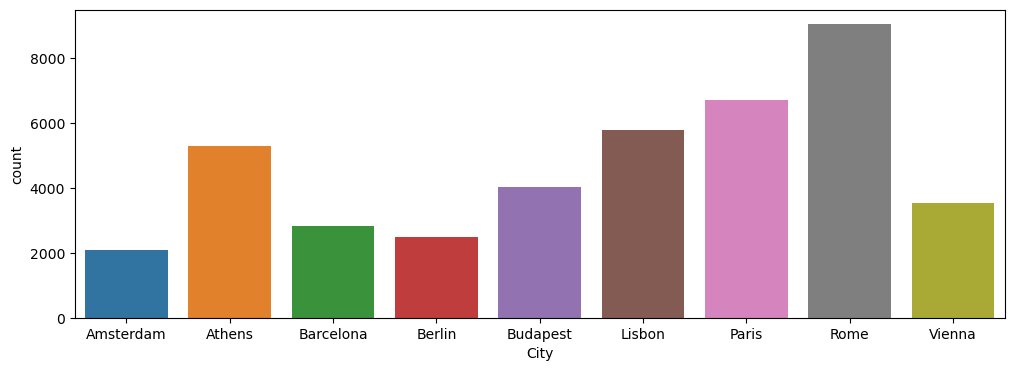

In [99]:
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.countplot(data=df, x='City')
plt.show()

Podemos observar que Roma es la ciudad que tiene más locales en alquier, por lo que desecharemos las demás ciudades y repetiremos los cálculos realizados anteriormente.

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_21157/3420015570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Rome.corr()


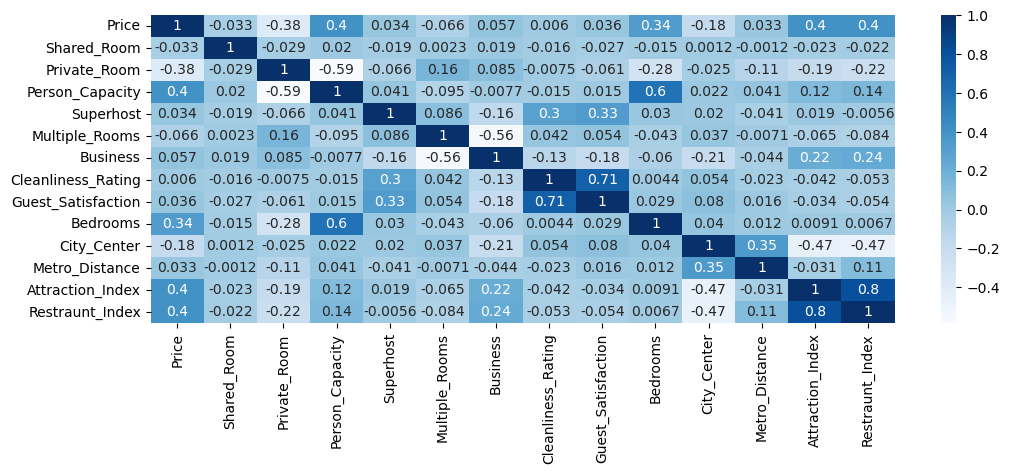

In [100]:
df_Rome=df[df['City']=='Rome']
correlation_matrix = df_Rome.corr()
fig, ax = plt.subplots(figsize=(12,4))
ax=sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.show()


Podemos ver que la matriz de correlación mejoró notablemente los índices entre las variables elegidas 'Person_Capacity', 'Bedrooms', 'Attraction_Index', 'Restraunt_Index' y 'Private_Room' respecto a la variable dependiente 'Price' pasando de 0.1-0.2 a 0.3-0.4

Por otra parte, podemos ver que las variables 'Attraction_Index' y 'Restraunt_Index' están fuertemente relacionadas, lo que indica que dan una información similar, por lo tanto sólo nos quedaremos sólo con 'Attraction_Index'.

Nuevamente calcularemos los p-valores y r con pingouin, pero esta vez sólo para la ciudad de Roma.

In [101]:
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Person_Capacity'], y=df_Rome['Price'])
print('Person Capacity:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Bedrooms'], y=df_Rome['Price'])
print('Bedrooms:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Attraction_Index'], y=df_Rome['Price'])
print('Attraction Index:')
print(correlation)
print('-------------------------------------------------------------')
correlation = pg.corr(x=df_Rome['Private_Room'], y=df_Rome['Price'])
print('Private_Room:')
print(correlation)
print('-------------------------------------------------------------')

-------------------------------------------------------------
Person Capacity:
            n         r         CI95%  p-val BF10  power
pearson  9027  0.403907  [0.39, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Bedrooms:
            n         r         CI95%          p-val        BF10  power
pearson  9027  0.336617  [0.32, 0.35]  5.181617e-238  5.627e+233    1.0
-------------------------------------------------------------
Attraction Index:
            n        r         CI95%  p-val BF10  power
pearson  9027  0.40231  [0.38, 0.42]    0.0  inf    1.0
-------------------------------------------------------------
Private_Room:
            n       r           CI95%          p-val        BF10  power
pearson  9027 -0.3757  [-0.39, -0.36]  1.411633e-300  1.793e+296    1.0
-------------------------------------------------------------


Nuevamente vemos que los índices mejoraron notablemente, ya que los p-val se mantienen muy por debajo de 0.05 y además los valores de r mejoraron, pasando de 0.1-0.2 a 0.3-0.4

Además, vemos que 'Attraction_Index' 

Por último, crearemos un modelo lineal con la librería statsmodel para los locales de Roma.

In [102]:
import statsmodels.formula.api as sm

model = 'Price ~ Person_Capacity + Bedrooms + Attraction_Index + Private_Room'
lm    = sm.ols(formula = model, data = df_Rome).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1109.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:16:29   Log-Likelihood:                -54115.
No. Observations:                9027   AIC:                         1.082e+05
Df Residuals:                    9022   BIC:                         1.083e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               57.8881      4.464     12.967      0.000      49.137      66.639
Private_Room[T.True]   -40.3660      2.637    -15.306      0.000     -45.535     -35.197
Person_Capacity         13.3232      1.158     11.502      0.000      11.053      15.594
Bedrooms                42.8450      2.335     18.351      0.000      38.268      47.422
Attraction_Index       139.2528      3.488     39.918      0.000     132.415     146.091
==============================================================================
Omnibus:                    13484.395   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9571858.035
Skew:                           8.979   Prob(JB):                         0.00
Kurtosis:                     161.512   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Según el análisis anterior podemos decir a favor del modelo que, para las 5 variables independientes elegidas:
- los valores de P>|t| se encuentran muy por debajo de 0.05
- los coeficientes de relación no incluyen pendiente igual a 0 con el 95% de probabilidad 
- los valores de std err son relativamente bajos (entre un 5% a 10%) respecto a los valores de coef

Sin embargo, debe tenerse en cuenta el r-squared indica que sólo el 33% de la variabilidad es explicada por el modelo.

## MACHINE LEARNING

### FEATURE SELECTION

En función de lo analizado anteriormente, usaremos el método de Forward Selection para reducir la dimensionalidad de nuestro dataset.

Para ello, pediremos que seleccione las 5 mejores variables independientes que mejor explican la variación de la variable dependiente precio.

In [103]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

X=df_Rome.drop(['Price','City','Day','Room_Type'],1)
y=df_Rome['Price']

sfs.fit(X, y)
sfs.k_feature_names_ 

/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_21157/2429436873.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type'],1)


('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Vemos que el resultado obtenido es el mismo que habíamos obtenido anteriormente usando la matriz de correlación.

Repetiremos el cálculo anterior, pero esta vez usaremos el Backward Selection, para confirmar la inforamción obtenida.

In [104]:
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_ 

('Private_Room',
 'Person_Capacity',
 'Bedrooms',
 'Attraction_Index',
 'Restraunt_Index')

Los resultados obtenido son los mismos para Foward Selection y Backward Selection, a la vez que coinciden con los obtenidos en nuestra matriza de correlación.

Siguiente nuestro análisis anterior, pediremos que elimine una de las 5 variables independientes escogida, ya que habíamos verificado que 'Attraction_Index' y 'Restraunt_Index' indican la misma información.

In [105]:
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_ 

('Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index')

La variable eliminada fue 'Restraunt_Index' quedándonos con las otras 4 variables que habíamos escogido anterioremente.

Podemos concluir a través de los distintos métodos usados (Forward Selection, Backward Selection y Matriz de correlación) que las variables que mejor explican el comportamiento del precio son: 'Private_Room', 'Person_Capacity', 'Bedrooms' y 'Attraction_Index'

### ALGORITMO DE REGRESIÓN

Habiendo obtenido las variables independientes que mejor explican las variaciones en el precio, entrenaremos nuestro modelo mediante algoritmo de regresión lineal, para luego validarlo mediante las métricas correspondientes

In [106]:
from sklearn.model_selection import train_test_split

X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',
                'Guest_Satisfaction','City_Center','Metro_Distance','Restraunt_Index'],1)
y=df_Rome['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

coeficientes = lr.coef_
intercepto = lr.intercept_

print("Variables:", X.columns)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)


Variables: Index(['Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index'], dtype='object')
Coeficientes: [-39.76009596  13.60331108  43.70066499 138.94134773]
Intercepto: 56.3883013928328


/var/folders/6b/nxxkks4j4t5815ftmyvm6xgh0000gn/T/ipykernel_21157/2274187655.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_Rome.drop(['Price','City','Day','Room_Type','Shared_Room','Superhost','Multiple_Rooms','Business', 'Cleanliness_Rating',


El modelo obtenido indica que el precio de los alquileres parte de una base de 56 euros por día, aumentando 14 euros por cada persona adicional de capacidad, 44 euros por cada habitación adicional y 139 euros por cada punto de mejora en cercanía a atracciones. Además, baja 40 euros en caso de tener habitación privada.

Estos valores son coherentes con los obtenidos anteriormente mendiante la librería statsmodel.

### VALIDACIÓN DEL MODELO

Para validar el modelo obtenido calcularemos las métricas:
- MAE: Error absoluto medio
- MSE: Error cuadrático medio
- RMSE: Raiz del error cuadrático medio
- RMSLE: Raiz del error cuadrático medio del logaritmo
- R2: Coeficiente de determinación

In [107]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Métricas Regresión Lineal')
print('------------------------')

mae_lr=mean_absolute_error(y_test,y_pred_lr)
mse_lr=mean_squared_error(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmsle_lr=np.log(np.sqrt(mean_squared_error(y_test,y_pred_lr)))
r2_lr=r2_score(y_test,y_pred_lr)

print("MAE",mae_lr)
print("MSE",mse_lr)
print("RMSE",rmse_lr)
print("RMSLE",rmsle_lr)
print("R2",r2_lr)


Métricas Regresión Lineal
------------------------
MAE 46.88225496683435
MSE 5511.49035220852
RMSE 74.23941239132029
RMSLE 4.307295173459018
R2 0.4416684264998433


### CONCLUSIONES

Si bien las selección de variables independientes fue verificada mediante distintos métodos (matriz de correlación, forward y backward selection) y los coeficientes fueron coherentes con los obtenidos anteriormente, vemos que los métodos de validación del modelo no arrojan resultados positivos.

Tanto el MAE como el RMSE arrojan valores muy altos (47 y 74 respectivamente), teniendo en cuenta que el valor promedio de alquiler es alrededor de 200 euros, errores de entre 47 y 74 son demasiado altos para permitirnos aceptar el modelo. 

En igual sentido, el valor de R2 indica que nuestro modelo explica sólo el 44% de las variaciones de nuestra variable dependiente (precio).

Creemos que esto puede deberse a un error de underfitting, lo que podría solucionarse complejizando el modelo u obteniendo mayor cantidad de información a los fines de entrenarlo en mejor medida. 

## EVALUACIÓN DE MODELOS

Teniendo en cuenta las conclusiones anteriores, donde vimos que el modelo de regresión lineal no se ajustaba a nuestro caso, intentaremos buscar un modelo que obtenga mejores métricas.

En primer lugar, usaremos el modelo de regresión polinómica.

In [108]:
from sklearn.preprocessing import PolynomialFeatures

grado_polynomial = 2
poly_features = PolynomialFeatures(degree=grado_polynomial)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

modelo_polynomial = LinearRegression()
modelo_polynomial.fit(X_train_poly, y_train)

y_pred_poly = modelo_polynomial.predict(X_test_poly)

coeficientes = modelo_polynomial.coef_
intercepto = modelo_polynomial.intercept_

print("Variables:", X.columns)
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)
print("-----------------------------")


print('Métricas Regresión Polinómica')
print('-----------------------------')

mae_poly=mean_absolute_error(y_test,y_pred_poly)
mse_poly=mean_squared_error(y_test,y_pred_poly)
rmse_poly=np.sqrt(mean_squared_error(y_test,y_pred_poly))
rmsle_poly=np.log(np.sqrt(mean_squared_error(y_test,y_pred_poly)))
r2_poly=r2_score(y_test,y_pred_poly)

print("MAE",mae_poly)
print("MSE",mse_poly)
print("RMSE",rmse_poly)
print("RMSLE",rmsle_poly)
print("R2",r2_poly)


Variables: Index(['Private_Room', 'Person_Capacity', 'Bedrooms', 'Attraction_Index'], dtype='object')
Coeficientes: [ 0.00000000e+00  7.27316347e+13  1.32953850e-01 -4.82777277e+01
  8.93013152e+01 -7.27316347e+13  1.88053689e+00  1.02891149e+01
  4.53952292e-01 -2.91297570e+00  1.97483789e+01  1.44966062e+01
 -4.16859490e+00  4.80786595e+01 -3.31861741e+01]
Intercepto: 154.27047517436648
-----------------------------
Métricas Regresión Polinómica
-----------------------------
MAE 44.810705451901896
MSE 5028.979040556048
RMSE 70.9152948280979
RMSLE 4.261486134223621
R2 0.4905483632593437


Podemos ver que las métricas de la regresión polinómica son un poco mejores que la regresión lineal. En particular el RMSE baja de 74 a 70 y el R2 sube de 0.44 a 0.49. Aún así, estas mejoras no son suficientes para hacer aceptable al modelo.

Intentaremos esta vez con el modelo de regresión de vecinos más cercanos KNN:

In [109]:
from sklearn.neighbors import KNeighborsRegressor

knn_regresor = KNeighborsRegressor(n_neighbors=5)
knn_regresor.fit(X_train, y_train)
y_pred_knn = knn_regresor.predict(X_test)

print('Métricas Regresión KNN')
print('----------------------')
mae_knn=mean_absolute_error(y_test,y_pred_knn)
mse_knn=mean_squared_error(y_test,y_pred_knn)
rmse_knn=np.sqrt(mean_squared_error(y_test,y_pred_knn))
rmsle_knn=np.log(np.sqrt(mean_squared_error(y_test,y_pred_knn)))
r2_knn=r2_score(y_test,y_pred_knn)

print("MAE",mae_knn)
print("MSE",mse_knn)
print("RMSE",rmse_knn)
print("RMSLE",rmsle_knn)
print("R2",r2_knn)



Métricas Regresión KNN
----------------------
MAE 46.69205967338648
MSE 5642.4490492094
RMSE 75.11623692125026
RMSLE 4.319036739412692
R2 0.42840189227997805


Las métricas del modelo knn son peores incluso que las de regresión lineal, aumentando el valor de RMSE y bajando el R2.

Para poder comparar mejor los tres modelos (lineal, polinómica y knn) haremos algunos gráficos.

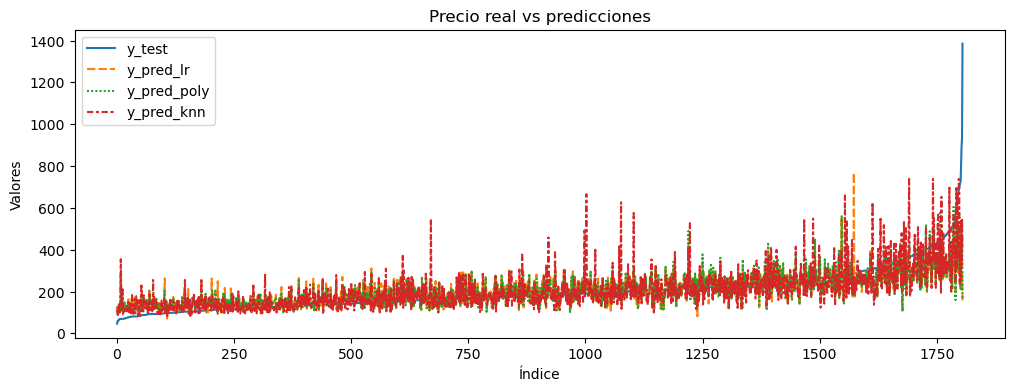

In [128]:
data_graf = {
    'y_test': y_test,
    'y_pred_lr': y_pred_lr,
    'y_pred_poly': y_pred_poly,
    'y_pred_knn': y_pred_knn,
}

df_graf = pd.DataFrame(data_graf)

df_graf_orden = df_graf.sort_values(by='y_test', ascending=True)
df_graf_orden.reset_index(drop=True, inplace=True)


fig, ax = plt.subplots(figsize=(12,4))
ax=sns.lineplot(data=df_graf_orden)

plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Precio real vs predicciones')
plt.show()



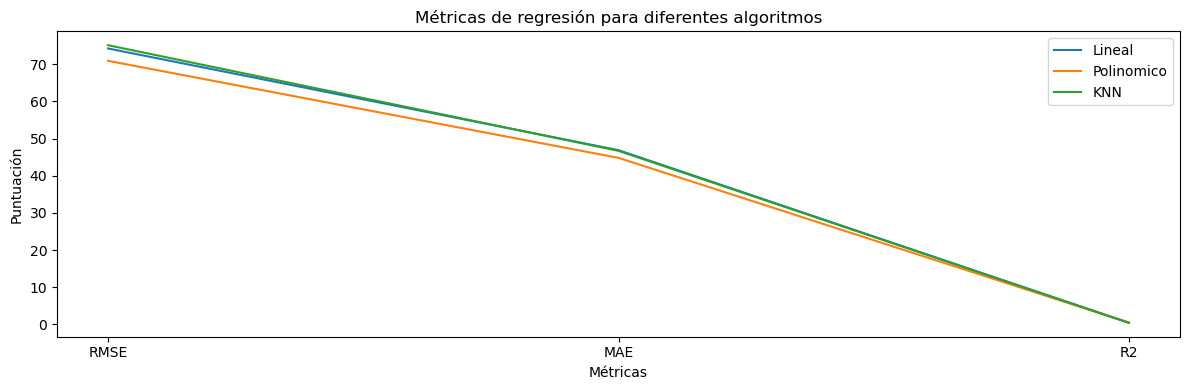

In [130]:
model_names = ['RMSE', 'MAE', 'R2']
linear = [rmse_lr, mae_lr, r2_lr]   # Mean Squared Error (Error Cuadrático Medio)
polinomico= [rmse_poly, mae_poly, r2_poly]  # Mean Absolute Error (Error Absoluto Medio)
knn = [rmse_knn, mae_knn, r2_knn]    # R-squared (Coeficiente de Determinación)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(model_names, linear, label='Lineal')
ax.plot(model_names, polinomico, label='Polinomico')
ax.plot(model_names, knn, label='KNN')

ax.set_xlabel('Métricas')
ax.set_ylabel('Puntuación')
ax.set_title('Métricas de regresión para diferentes algoritmos')
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

